In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob

In [2]:
data = pd.read_csv('Ebay_products.csv')

In [3]:
data.head()

,Unnamed: 0,0,1,2,3
0,0,1,314,It was nice produt. I like it's design a lot. ...,5
1,1,1,439,awesome sound....very pretty to see this nd th...,5
2,2,1,588,awesome bass sound quality very good bettary l...,5
3,3,1,1169,Awsome sound powerful bass battery backup is a...,5
4,4,1,1185,"First of all, I want to talk about sound quali...",5


In [4]:
data.drop(data.filter(regex="Unname"),axis=1,inplace=True)

In [5]:
data.rename(columns={'0':'Productid','1':'User_id','2':'Reviews','3':'Rating'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Productid  2500 non-null   int64 
 1   User_id    2500 non-null   int64 
 2   Reviews    2500 non-null   object
 3   Rating     2500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 78.2+ KB


In [7]:
data.head()

,Productid,User_id,Reviews,Rating
0,1,314,It was nice produt. I like it's design a lot. ...,5
1,1,439,awesome sound....very pretty to see this nd th...,5
2,1,588,awesome bass sound quality very good bettary l...,5
3,1,1169,Awsome sound powerful bass battery backup is a...,5
4,1,1185,"First of all, I want to talk about sound quali...",5


In [7]:
data['Rating'].value_counts()

5    1460
4     584
3     199
1     190
2      67
Name: Rating, dtype: int64

In [8]:
len(data['Productid'].unique())

31

In [9]:
len(data['User_id'].unique())

350

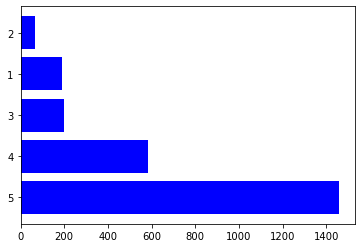

In [10]:
labels = ['5','4','3','1','2']
values = [1460,584,199,190,67]
plt.barh(labels,values,color='blue')
plt.show()

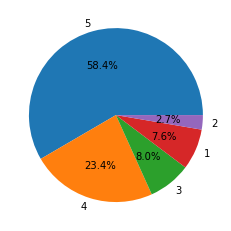

In [11]:
plt.pie(values,labels=labels,autopct='%0.1f%%')
plt.show()

In [12]:
def sentiment_calc(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None
data['sentiment'] = data['Reviews'].apply(sentiment_calc)
data

,Productid,User_id,Reviews,Rating,sentiment
0,1,314,It was nice produt. I like it's design a lot. ...,5,0.511111
1,1,439,awesome sound....very pretty to see this nd th...,5,0.591667
2,1,588,awesome bass sound quality very good bettary l...,5,0.351250
3,1,1169,Awsome sound powerful bass battery backup is a...,5,0.340385
4,1,1185,"First of all, I want to talk about sound quali...",5,0.425714
...,...,...,...,...,...
2495,30,50133,very good product and durableREAD MORE,5,0.705000
2496,30,51460,Good productREAD MORE,5,0.600000
2497,30,52469,I love❤ this headphone very very much 💕💕 worth...,5,0.400000
2498,30,52583,LookingREAD MORE,5,0.500000


In [13]:
data['Updated_score'] = data['Rating']*data['sentiment']
data

,Productid,User_id,Reviews,Rating,sentiment,Updated_score
0,1,314,It was nice produt. I like it's design a lot. ...,5,0.511111,2.555556
1,1,439,awesome sound....very pretty to see this nd th...,5,0.591667,2.958333
2,1,588,awesome bass sound quality very good bettary l...,5,0.351250,1.756250
3,1,1169,Awsome sound powerful bass battery backup is a...,5,0.340385,1.701923
4,1,1185,"First of all, I want to talk about sound quali...",5,0.425714,2.128571
...,...,...,...,...,...,...
2495,30,50133,very good product and durableREAD MORE,5,0.705000,3.525000
2496,30,51460,Good productREAD MORE,5,0.600000,3.000000
2497,30,52469,I love❤ this headphone very very much 💕💕 worth...,5,0.400000,2.000000
2498,30,52583,LookingREAD MORE,5,0.500000,2.500000


In [14]:
dict1 = {'1':[-5,-4,-3.75,-3,-2.5,-2.25,-2,-1.5,-1.25,-1,-0.75,-0.5,-0.25],'2':[-0.24,0.25,0.5,0.75,1] ,'3': [1.01,1.25,1.5,2],'4': [2.01,2.25,2.5,3],'5':[3.01,3.75,4,5]}

def fun(val):
     for i in dict1:
        for j in dict1[i]:
            if val==j:
                return i
            if val<=j:
                return i
    

In [15]:
data['New_score'] = data['Updated_score'].apply(fun)
data['New_score'] = pd.to_numeric(data['New_score'])
data

,Productid,User_id,Reviews,Rating,sentiment,Updated_score,New_score
0,1,314,It was nice produt. I like it's design a lot. ...,5,0.511111,2.555556,4
1,1,439,awesome sound....very pretty to see this nd th...,5,0.591667,2.958333,4
2,1,588,awesome bass sound quality very good bettary l...,5,0.351250,1.756250,3
3,1,1169,Awsome sound powerful bass battery backup is a...,5,0.340385,1.701923,3
4,1,1185,"First of all, I want to talk about sound quali...",5,0.425714,2.128571,4
...,...,...,...,...,...,...,...
2495,30,50133,very good product and durableREAD MORE,5,0.705000,3.525000,5
2496,30,51460,Good productREAD MORE,5,0.600000,3.000000,4
2497,30,52469,I love❤ this headphone very very much 💕💕 worth...,5,0.400000,2.000000,3
2498,30,52583,LookingREAD MORE,5,0.500000,2.500000,4


In [16]:
df_pivot = data.pivot_table(index='Productid',columns='User_id',values='New_score').fillna(0)
df_pivot

User_id,314,439,588,725,951,1088,1136,1169,1185,1952,...,51838,52007,52036,52469,52583,52740,53145,53245,53292,53293
Productid,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,3.0,4.0,4.0,0.0,0.0,3.0,0.0
7,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
8,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
9,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [17]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values) 
print(df_pivot_matrix)

  (0, 0)	4.0
  (0, 1)	4.0
  (0, 2)	3.0
  (0, 7)	3.0
  (0, 8)	4.0
  (0, 10)	3.0
  (0, 14)	4.0
  (0, 15)	2.0
  (0, 20)	2.0
  (0, 22)	3.0
  (0, 27)	2.0
  (0, 29)	3.0
  (0, 32)	4.0
  (0, 37)	4.0
  (0, 41)	4.0
  (0, 55)	3.0
  (0, 61)	4.0
  (0, 62)	5.0
  (0, 63)	4.0
  (0, 66)	4.0
  (0, 69)	5.0
  (0, 72)	4.0
  (0, 81)	4.0
  (0, 83)	4.0
  (0, 89)	2.0
  :	:
  (29, 255)	4.0
  (29, 256)	3.0
  (29, 259)	4.0
  (29, 281)	5.0
  (29, 292)	5.0
  (29, 295)	2.0
  (29, 297)	4.0
  (29, 303)	4.0
  (29, 304)	4.0
  (29, 310)	3.0
  (29, 317)	3.0
  (29, 319)	4.0
  (29, 320)	3.0
  (29, 321)	4.0
  (29, 322)	5.0
  (29, 323)	4.0
  (29, 327)	2.0
  (29, 328)	3.0
  (29, 329)	5.0
  (29, 330)	3.0
  (29, 331)	5.0
  (29, 337)	4.0
  (29, 343)	3.0
  (29, 344)	4.0
  (30, 252)	3.0


In [18]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', n_neighbors=25, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=25, radius=1)

In [19]:
similarity_matrix = cosine_similarity(df_pivot)
similarity_matrix

array([[1.        , 0.38230409, 0.4608721 , 0.29585972, 0.31404883,
        0.22267887, 0.33531856, 0.30287059, 0.42593975, 0.26326134,
        0.38557202, 0.24840694, 0.21345462, 0.27882573, 0.31876371,
        0.34765281, 0.42980496, 0.30180576, 0.36855717, 0.40989115,
        0.27431108, 0.3806357 , 0.36145879, 0.31538603, 0.31520577,
        0.3079348 , 0.33742924, 0.2871545 , 0.23377912, 0.26371662,
        0.08796935],
       [0.38230409, 1.        , 0.41576718, 0.4476193 , 0.46050281,
        0.11042841, 0.46296911, 0.44992824, 0.40944227, 0.40333227,
        0.3841272 , 0.18008751, 0.44938028, 0.45780884, 0.45186369,
        0.43816661, 0.25923193, 0.49586874, 0.50599078, 0.31611681,
        0.36497985, 0.45211662, 0.46345807, 0.46824968, 0.3941293 ,
        0.3970992 , 0.43779536, 0.55314385, 0.39751821, 0.13829871,
        0.13005122],
       [0.4608721 , 0.41576718, 1.        , 0.33214579, 0.31737096,
        0.21799373, 0.30129332, 0.39165273, 0.32563888, 0.47002403,
      

In [20]:
product_ID = int(input('Enter Product ID according to data set : '))
data1 = list(df_pivot.index) 
print(data1)

Enter Product ID according to data set : 25
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 100]


In [21]:
query_index = data1.index(product_ID) 
print(query_index)

24


In [22]:
similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 12)
print(similarity)
print(indices)

[[1.11022302e-16 2.92540723e-01 4.06900509e-01 4.15529010e-01
  4.22674015e-01 4.59750554e-01 5.19314572e-01 5.82386301e-01
  5.85642992e-01 6.05870699e-01 6.37756456e-01 6.43816524e-01]]
[[24 26 20 22 23 17 16 25 19  1  6 12]]


In [23]:
data_dict={}
for i in range(0, len(similarity.flatten())):    

    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        data_dict[str(df_pivot.index[indices.flatten()[i]])] = float(similarity.flatten()[i])
        print(f'{df_pivot.index[indices.flatten()[i]]}, is similarity distance = with {similarity.flatten()[i]:.20f}:')

print(data_dict)

Recommendations for 25:

27, is similarity distance = with 0.29254072343438963788:
21, is similarity distance = with 0.40690050897743634817:
23, is similarity distance = with 0.41552901023890809196:
24, is similarity distance = with 0.42267401539001503430:
18, is similarity distance = with 0.45975055401699671531:
17, is similarity distance = with 0.51931457225465860184:
26, is similarity distance = with 0.58238630079293929320:
20, is similarity distance = with 0.58564299223543780926:
2, is similarity distance = with 0.60587069938180948547:
7, is similarity distance = with 0.63775645618458276509:
13, is similarity distance = with 0.64381652366625941042:
{'27': 0.29254072343438964, '21': 0.40690050897743635, '23': 0.4155290102389081, '24': 0.42267401539001503, '18': 0.4597505540169967, '17': 0.5193145722546586, '26': 0.5823863007929393, '20': 0.5856429922354378, '2': 0.6058706993818095, '7': 0.6377564561845828, '13': 0.6438165236662594}


In [24]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [25]:
reader = Reader(rating_scale=(1, 5))
data1 = Dataset.load_from_df(data[['User_id', 'Productid', 'New_score']], reader)

In [26]:
algo=SVD()
cross_validate(algo, data1, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0160  1.0049  0.9593  0.9997  0.9672  0.9894  0.0221  
Fit time          0.24    0.27    0.27    0.26    0.26    0.26    0.01    
Test time         0.02    0.00    0.00    0.00    0.02    0.01    0.01    


{'test_rmse': array([1.01600976, 1.00485305, 0.95932722, 0.9997331 , 0.96716643]),
 'fit_time': (0.2416553497314453,
  0.27375268936157227,
  0.27066826820373535,
  0.26013851165771484,
  0.25899672508239746),
 'test_time': (0.015621662139892578, 0.0, 0.0, 0.0, 0.015620708465576172)}